In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme()

# Matrix size comparison

## Firmware dimensions

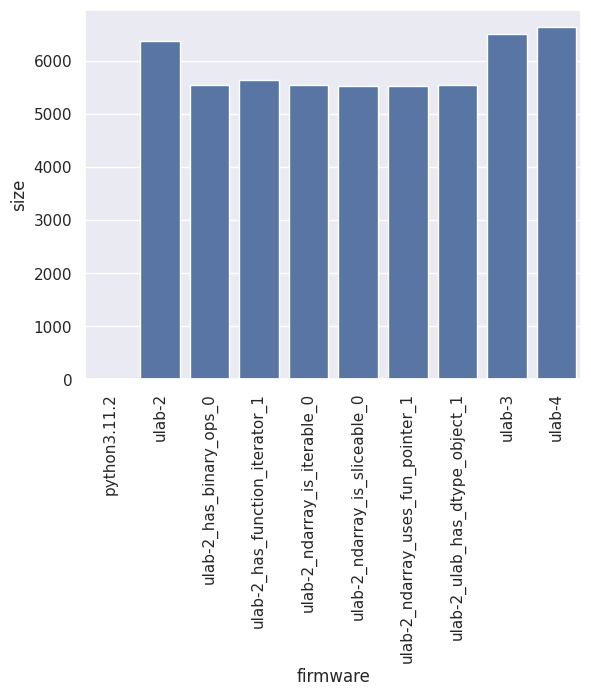

In [70]:
firmware_size = pd.read_csv("sizes.csv")
sns.barplot(data=firmware_size, x="firmware", y="size")
plt.xticks(rotation=90)
plt.show()

## Performance comparison

In [71]:
import os
from pathlib import Path

times_directory = Path("times")
firmwares = []
# for filename in os.listdir(times_directory):
for file in times_directory.iterdir():
	if not file.is_file() or not file.suffix == ".csv":
		continue
	times = pd.read_csv(str(file))
	times["firmware"] = file.stem
	firmwares.append(times)

results = pd.concat(firmwares)

results

# firmwares = {
# 	"python": pd.read_csv("times/[NUMPY] times.csv"),
# 	"2d": pd.read_csv("times/[ULAB] 2 times.csv"),
# 	"3d": pd.read_csv("times/[ULAB] 3 times.csv"),
# 	"4d": pd.read_csv("times/[ULAB] 4 times.csv"),
# }

,test name,id,time,valid,firmware
0,matrix multiplication,0,6.256674,True,python3.11.2
1,matrix multiplication,1,6.969706,True,python3.11.2
2,matrix multiplication,2,8.512345,True,python3.11.2
3,matrix multiplication,3,6.928444,True,python3.11.2
4,matrix multiplication,4,8.146868,True,python3.11.2
...,...,...,...,...,...
395,linear system,95,4.250000,True,ulab-2_ndarray_is_iterable_0
396,linear system,96,4.763000,True,ulab-2_ndarray_is_iterable_0
397,linear system,97,4.489000,True,ulab-2_ndarray_is_iterable_0
398,linear system,98,4.310000,True,ulab-2_ndarray_is_iterable_0


In [72]:
# for name, filename in firmwares.items():
# 	filename["firmware"] = name
# results = pd.concat(firmwares.values())
# results

In [73]:
invalid = results.loc[results["valid"] == False]
invalid_firmwares = invalid["firmware"].unique()
print(f"there are {len(invalid)} invalid tests from the firmwares:{invalid_firmwares}")

there are 396 invalid tests from the firmwares:['ulab-2_has_binary_ops_0']


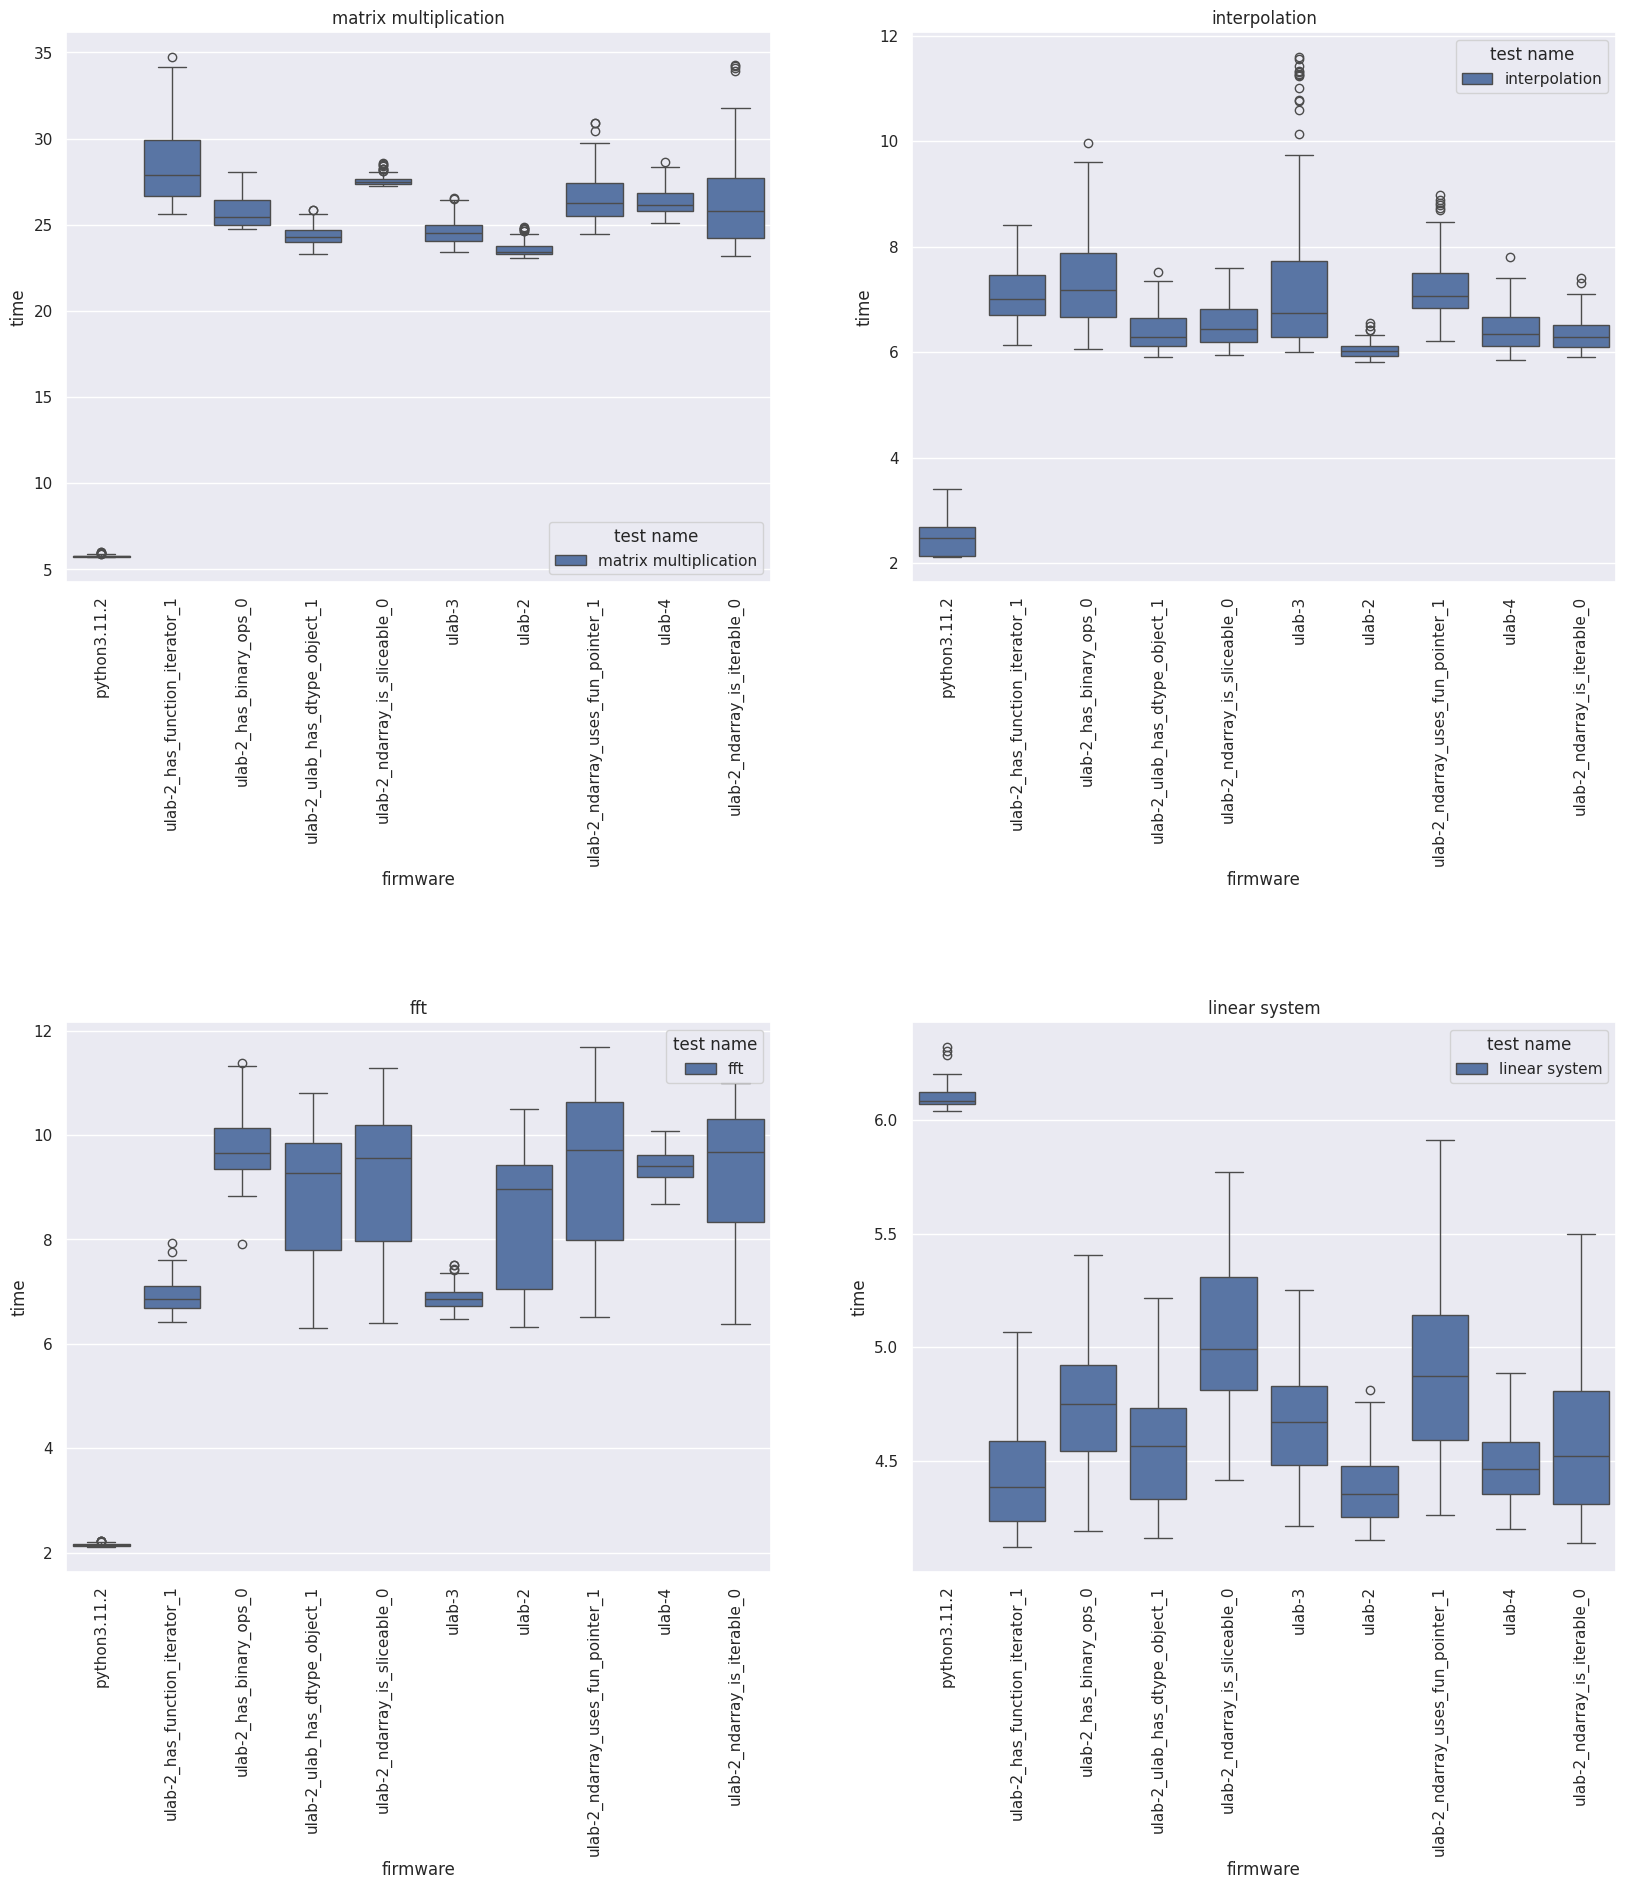

In [74]:
import math

# follows the iqr (interquantile range rule)
def remove_outliers(df, column):
    firmwares = df["firmware"].unique()
    bounded = []
    for f in firmwares:
        f_data = df.loc[df["firmware"] == f]
        Q1 = f_data[column].quantile(0.25)
        Q3 = f_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounded.append(f_data.loc[(f_data[column] >= lower_bound) & (f_data[column] <= upper_bound)])
    return pd.concat(bounded)

columns = 2
tests = results["test name"].unique()
fig, axes = plt.subplots(2, math.ceil(float(len(tests)) / 2), figsize=(20, 20))
for test, ax in zip(tests, axes.flatten()):
    test_data = results.loc[results["test name"] == test]
    no_outliers = remove_outliers(test_data, "time")
    ax.tick_params(axis="x", rotation=90)
    sns.boxplot(data=no_outliers, ax=ax, x="firmware", y="time", hue="test name")
    ax.set_title(test)

plt.subplots_adjust(hspace=0.8) 
plt.show()

In [75]:
aggregate = results.groupby(['firmware', 'test name'])["time"].agg(["min", "max", "median", "std"]).reset_index()
aggregate

,firmware,test name,min,max,median,std
0,python3.11.2,fft,2.105075,2.515283,2.147546,0.088138
1,python3.11.2,interpolation,2.115799,3.414490,2.482658,0.297066
2,python3.11.2,linear system,6.039118,34.469514,6.097647,3.718607
3,python3.11.2,matrix multiplication,5.706842,8.512345,5.756184,0.559328
4,ulab-2,fft,6.328000,17.288000,8.991500,1.695093
5,ulab-2,interpolation,5.806000,14.079000,6.051000,1.650400
6,ulab-2,linear system,4.153000,13.121000,4.354000,0.887183
7,ulab-2,matrix multiplication,23.073000,34.463000,23.472500,1.711972
8,ulab-2_has_binary_ops_0,fft,6.183000,17.900000,9.522000,1.797719
9,ulab-2_has_binary_ops_0,interpolation,6.058000,14.732000,7.276000,1.523330
